In [2]:
import geopandas as gpd
from shapely.geometry import Point
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go

In [3]:
os.chdir(r"C:\Users\garla\first-node\WalkExplorer\neighborhood_data")
print("Current directory:", os.getcwd())

Current directory: C:\Users\garla\first-node\WalkExplorer\neighborhood_data


In [4]:
crime_df = pd.read_csv(r"C:\Users\garla\first-node\WalkExplorer\neighborhood_data\SPD_Crime_Data__2008-Present_20250529.csv")

C:\Users\garla\AppData\Local\Temp\ipykernel_20736\3191850451.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv(r"C:\Users\garla\first-node\WalkExplorer\neighborhood_data\SPD_Crime_Data__2008-Present_20250529.csv")


In [5]:
# Coordinates for downtown Seattle area
north = 47.62425802431359
south = 47.596252480947555
east  = -122.31765250756945
west  = -122.35919327219091

In [6]:
print(crime_df.dtypes)

Report Number                     object
Report DateTime                   object
Offense ID                         int64
Offense Date                      object
NIBRS Group AB                    object
NIBRS Crime Against Category      object
Offense Sub Category              object
Shooting Type Group               object
Block Address                     object
Latitude                          object
Longitude                         object
Beat                              object
Precinct                          object
Sector                            object
Neighborhood                      object
Reporting Area                    object
Offense Category                  object
NIBRS Offense Code Description    object
NIBRS_offense_code                object
dtype: object


In [7]:
# Convert Latitude and Longitude columns to integer type
crime_df['Latitude'] = pd.to_numeric(crime_df['Latitude'], errors='coerce')
crime_df['Longitude'] = pd.to_numeric(crime_df['Longitude'], errors='coerce')
print(crime_df[['Latitude', 'Longitude']].dtypes)
print("NULL Lat, Lon data count")
print(crime_df[['Latitude', 'Longitude']].isna().sum())
print("VALID Lat, Lon data count")
print(crime_df[['Latitude', 'Longitude']].notna().sum())


Latitude     float64
Longitude    float64
dtype: object
NULL Lat, Lon data count
Latitude     210012
Longitude    210012
dtype: int64
VALID Lat, Lon data count
Latitude     1245312
Longitude    1245312
dtype: int64


In [8]:
# data subset of crime incidents that happened in downtown Seattle
downtown_crime_subset =  crime_df[
    (crime_df["Latitude"] >= south) &
    (crime_df["Latitude"] <= north) &
    (crime_df["Longitude"] >= west) &
    (crime_df["Longitude"] <= east)
]

In [9]:
print("Downtown NULL Lat, Lon data count")
print(downtown_crime_subset[['Latitude', 'Longitude']].isna().sum())
print("Downtown VALID Lat, Lon data count")
print(downtown_crime_subset[['Latitude', 'Longitude']].notna().sum())

Downtown NULL Lat, Lon data count
Latitude     0
Longitude    0
dtype: int64
Downtown VALID Lat, Lon data count
Latitude     312784
Longitude    312784
dtype: int64


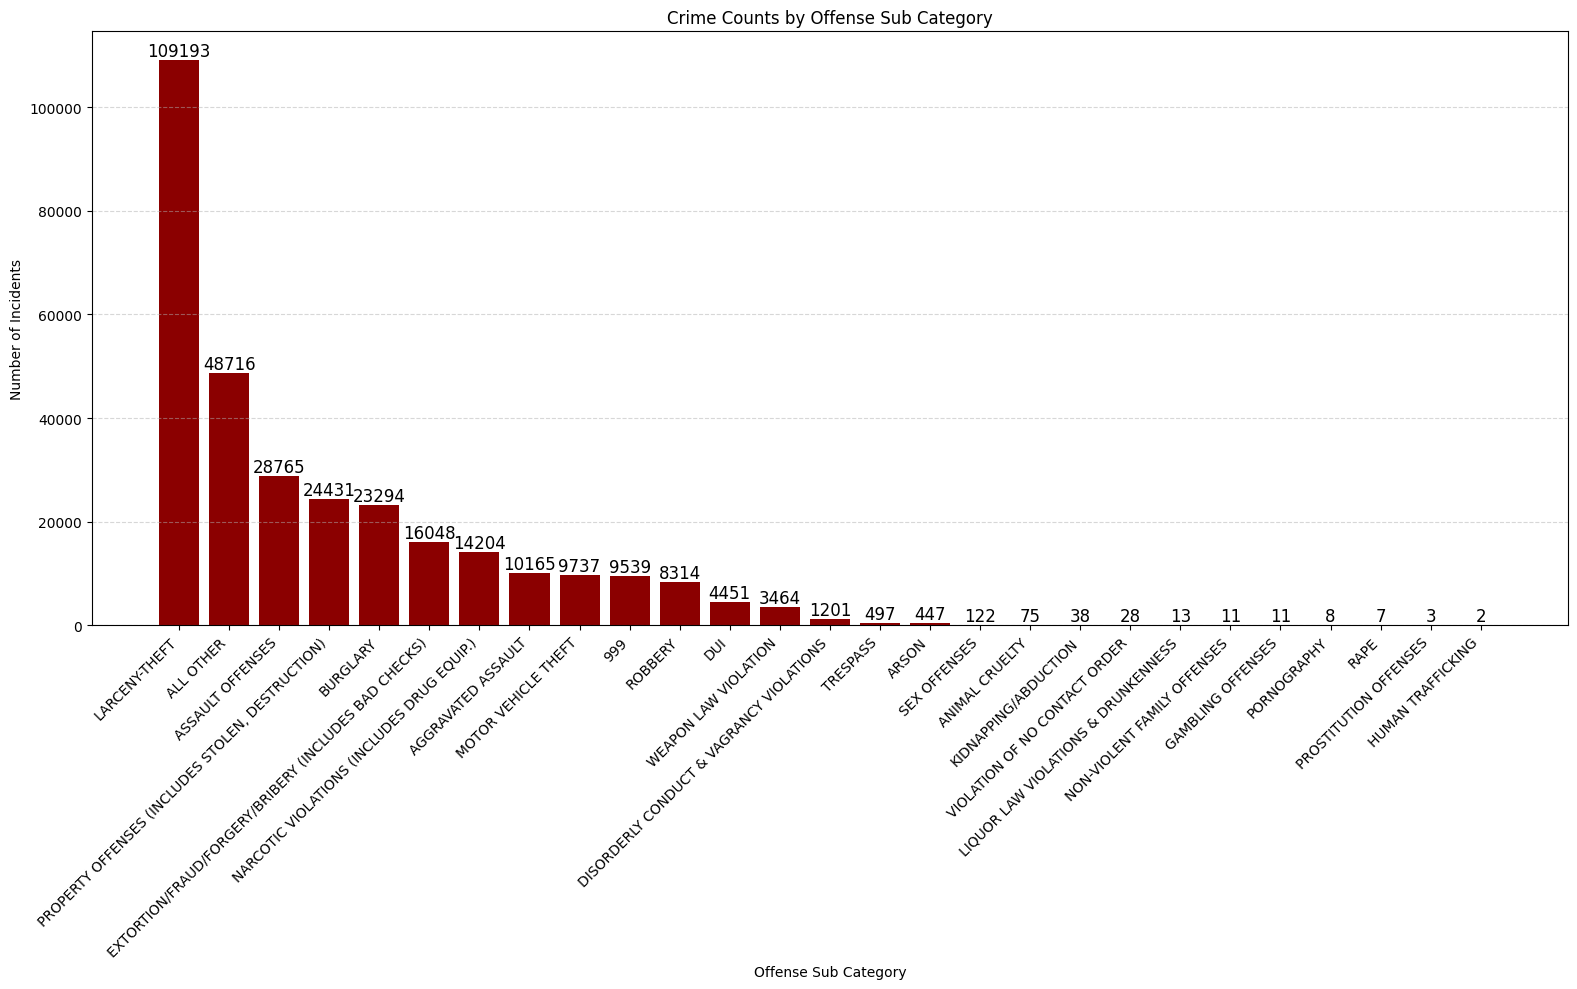

In [10]:
# 1. Bar Chart for Offense Sub Categories
offense_counts = downtown_crime_subset['Offense Sub Category'].value_counts()

plt.figure(figsize=(16, 10))
bars = plt.bar(offense_counts.index, offense_counts.values, color='darkred')
plt.title("Crime Counts by Offense Sub Category")
plt.xlabel("Offense Sub Category")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.show()

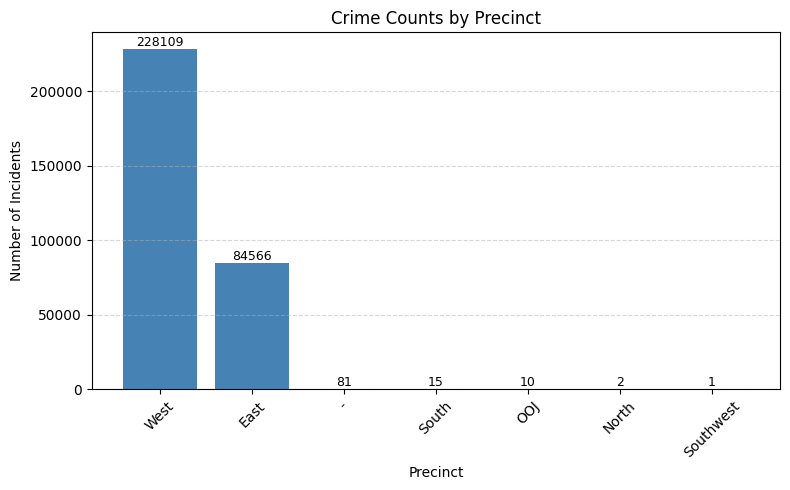

In [11]:
# 2. Bar Chart for Precincts
precinct_counts = downtown_crime_subset['Precinct'].value_counts()

plt.figure(figsize=(8, 5))
bars = plt.bar(precinct_counts.index, precinct_counts.values, color='steelblue')
plt.title("Crime Counts by Precinct")
plt.xlabel("Precinct")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.show()

C:\Users\garla\AppData\Local\Temp\ipykernel_20736\885238976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downtown_crime_subset['Report DateTime'] = pd.to_datetime(downtown_crime_subset['Report DateTime'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\garla\AppData\Local\Temp\ipykernel_20736\885238976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downtown_crime_subset['Year'] = downtown_crime_subset['Report DateTime'].dt.year


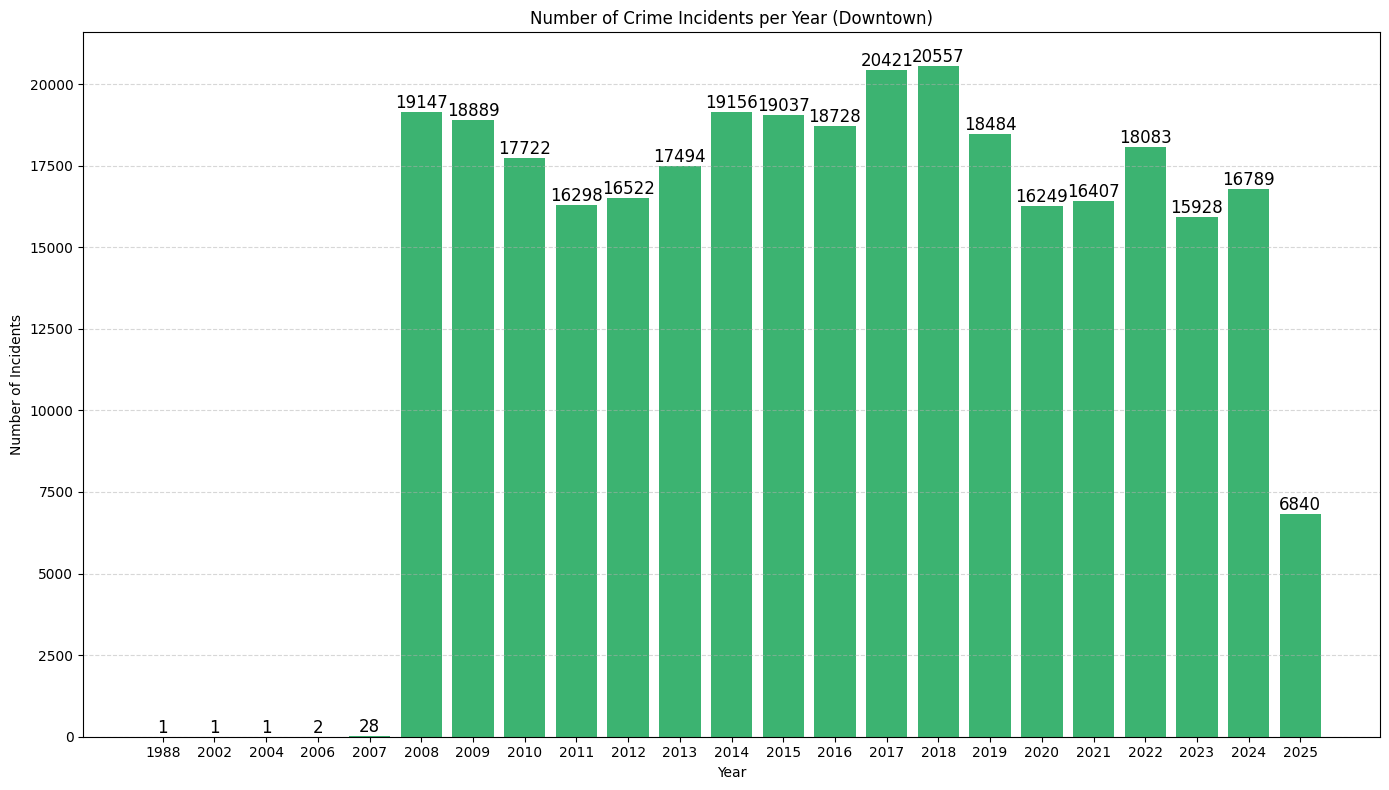

In [12]:
# Convert 'Report DateTime' column to datetime dtype
downtown_crime_subset['Report DateTime'] = pd.to_datetime(downtown_crime_subset['Report DateTime'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year into a new column
downtown_crime_subset['Year'] = downtown_crime_subset['Report DateTime'].dt.year

# Count incidents per year
year_counts = downtown_crime_subset['Year'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(year_counts.index.astype(str), year_counts.values, color='mediumseagreen')
plt.title("Number of Crime Incidents per Year (Downtown)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

plt.show()

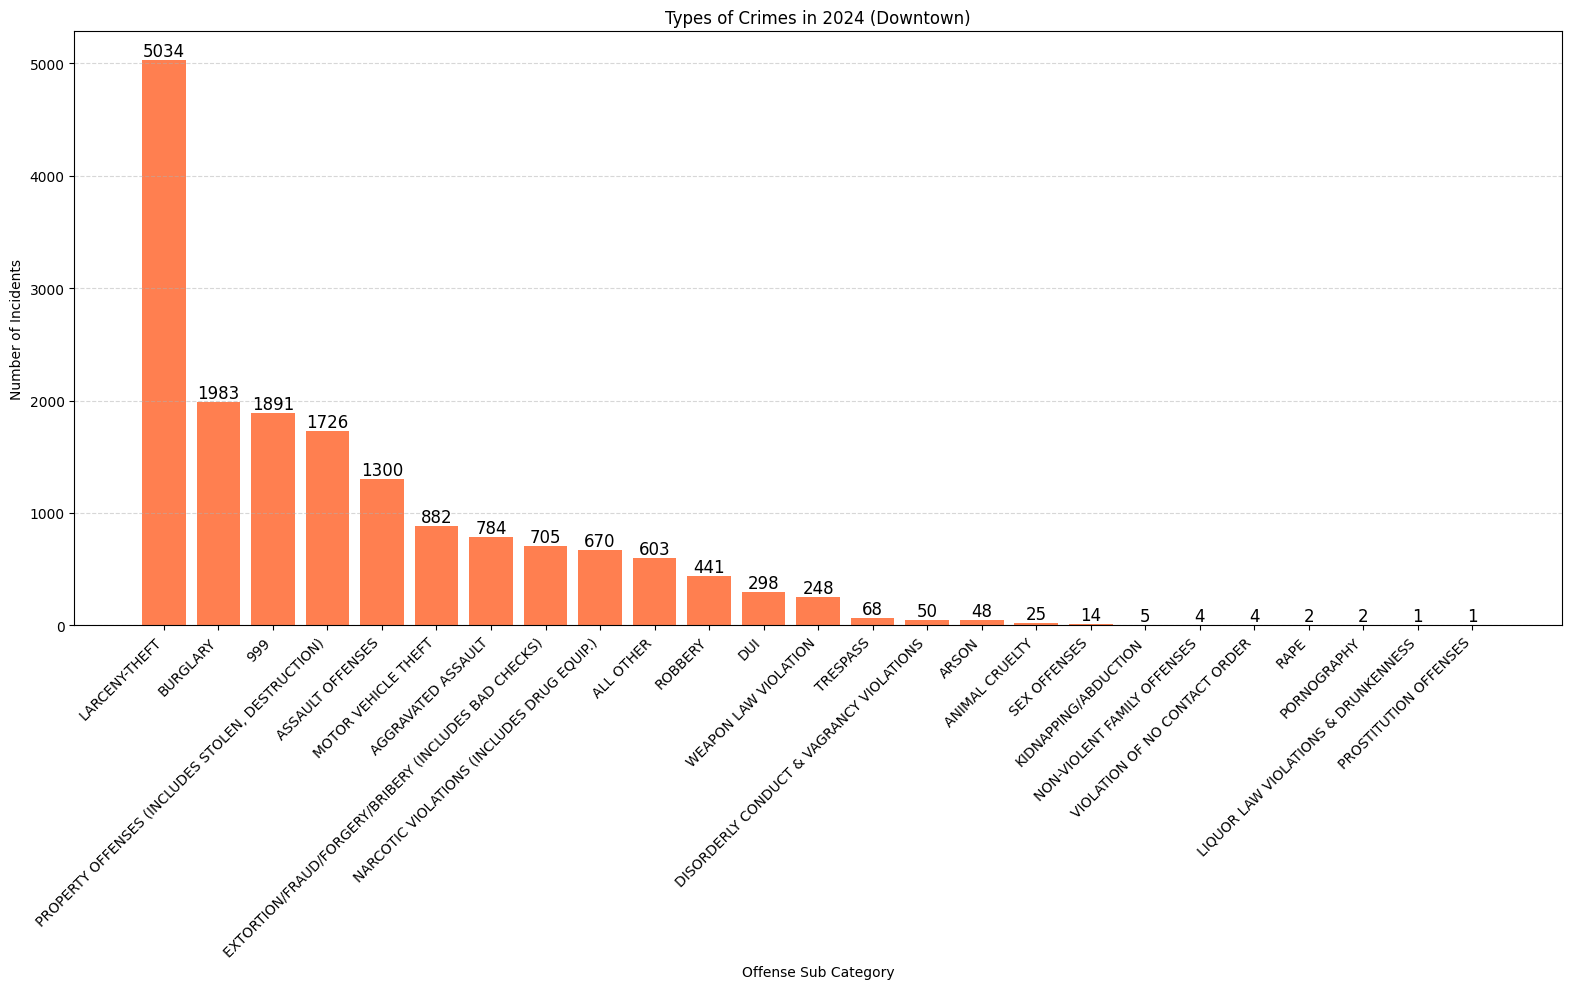

In [14]:
# Filter for incidents in 2024
crime_2024 = downtown_crime_subset[downtown_crime_subset['Report DateTime'].dt.year == 2024]

# Count the number of incidents by 'Offense Sub Category'
crime_type_counts = crime_2024['Offense Sub Category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(16, 10))
bars = plt.bar(crime_type_counts.index, crime_type_counts.values, color='coral')
plt.title("Types of Crimes in 2024 (Downtown)")
plt.xlabel("Offense Sub Category")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=12)

plt.show()
